# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Compute the covariance matrix of the training data
    X_mean = np.mean(X_train, axis=0)
    X_centered = X_train - X_mean
    
    # Compute covariance matrix (X.T @ X)
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Perform eigen decomposition on the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors by the magnitude of eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Project training and test data onto the new subspace
    X_train_svd = (X_train - X_mean) @ top_eigenvectors
    X_test_svd = (X_test - X_mean) @ top_eigenvectors

    return X_train_svd, X_test_svd, top_eigenvectors

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [12]:
svd_components = [28, 56, 98, 112, 196, 392]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, top_eigenvectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and measure accuracy and training time
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train_svd, y_train)
    training_time = time.time() - start_time
    
    # Predict on the test set and calculate accuracy
    y_pred = model.predict(X_test_svd)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results.append({'components': n_components, 'accuracy': accuracy, 'training_time': training_time, 'top_eigenvectors': top_eigenvectors})
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 28 components...
SVD components: 28, Accuracy: 0.8902, Training time: 2.9371 seconds
Applying custom SVD with 56 components...
SVD components: 56, Accuracy: 0.9122, Training time: 8.4677 seconds
Applying custom SVD with 98 components...
SVD components: 98, Accuracy: 0.9176, Training time: 22.0923 seconds
Applying custom SVD with 112 components...
SVD components: 112, Accuracy: 0.9181, Training time: 28.5986 seconds
Applying custom SVD with 196 components...
SVD components: 196, Accuracy: 0.9207, Training time: 54.2645 seconds
Applying custom SVD with 392 components...
SVD components: 392, Accuracy: 0.9201, Training time: 159.5219 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


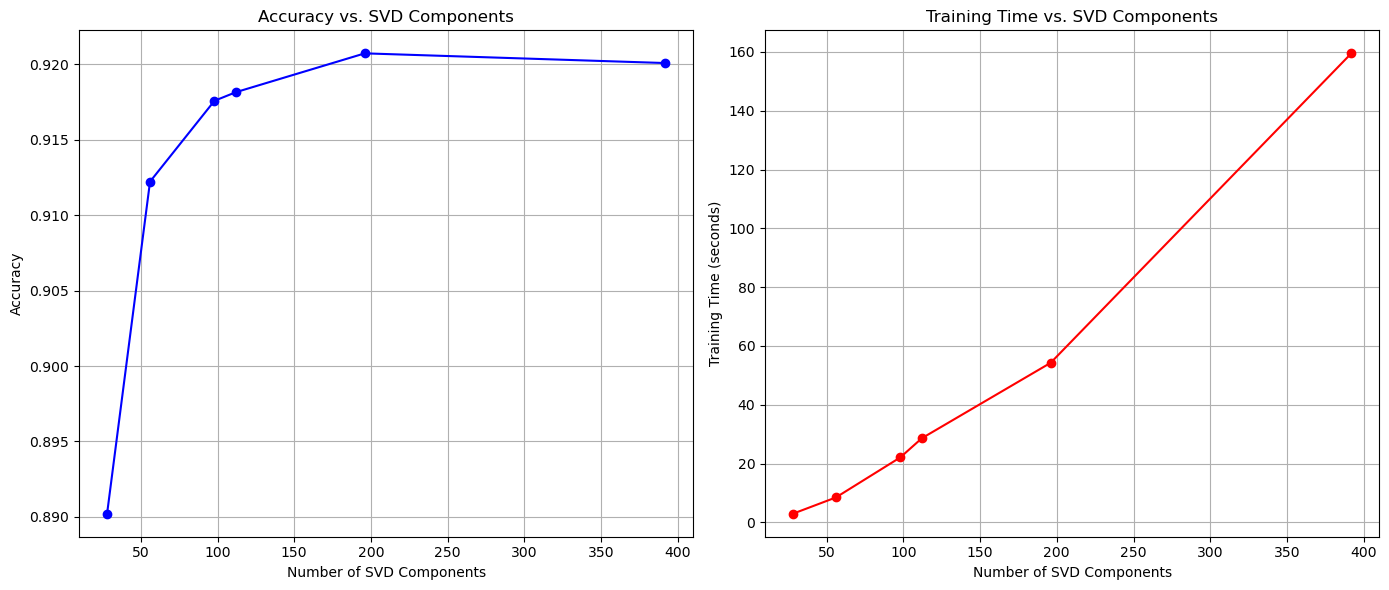

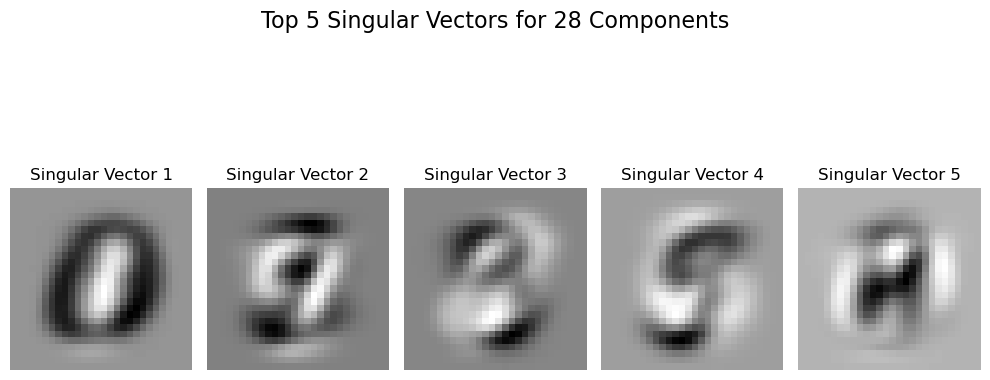

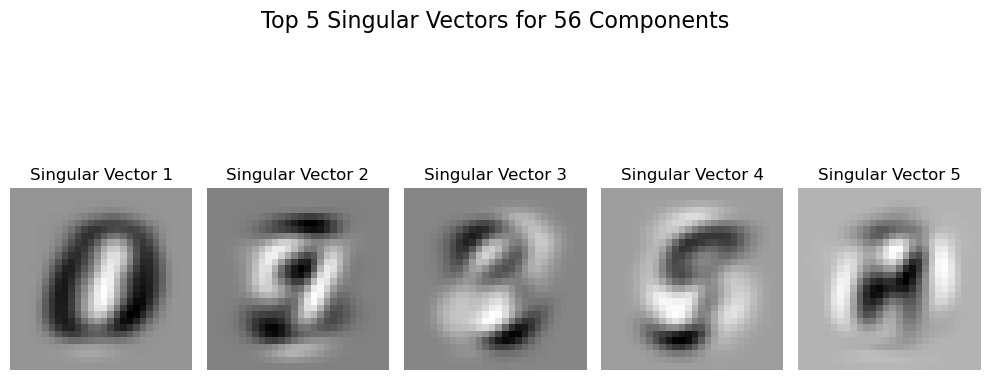

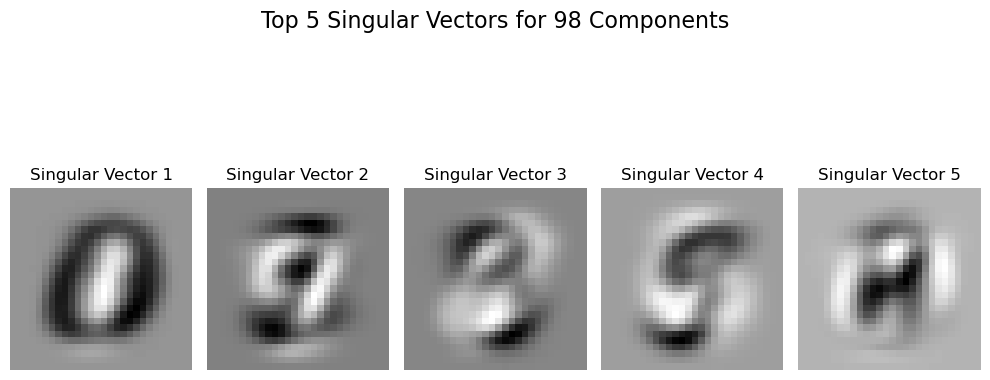

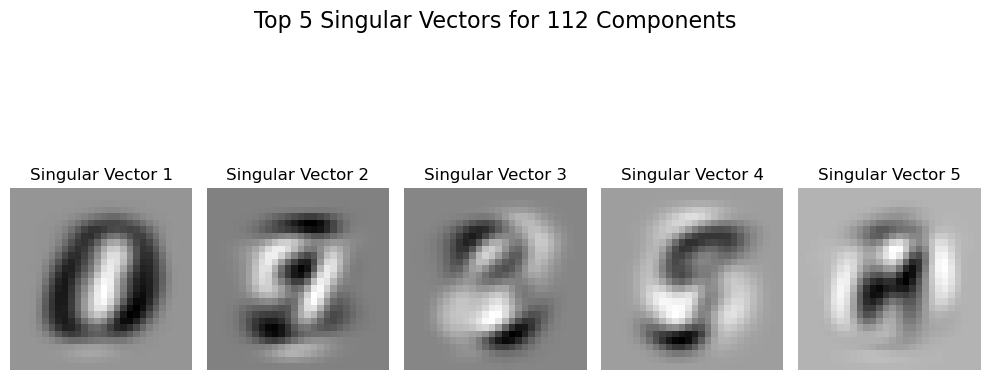

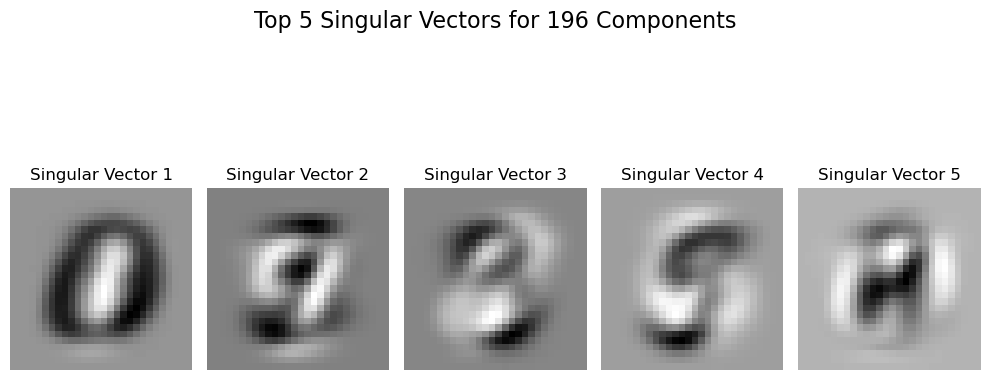

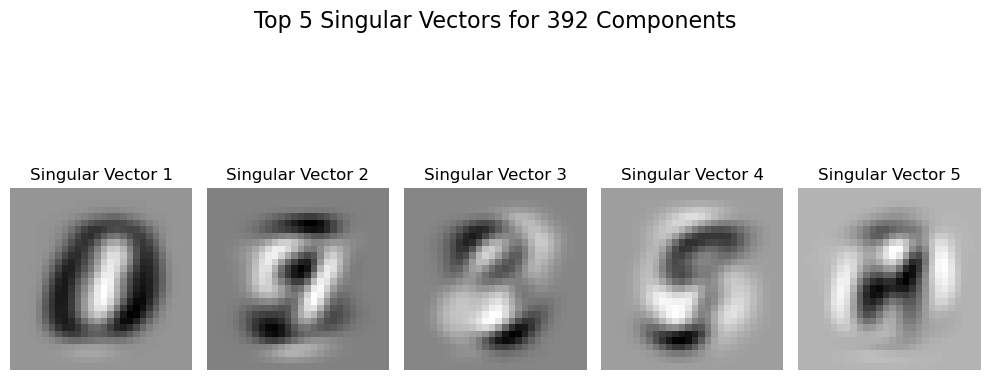

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Part 5: Visualize and Analyze the Results

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Plotting accuracy vs. number of SVD components
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df['components'], results_df['accuracy'], marker='o', linestyle='-', color='blue')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. SVD Components')
plt.grid(True)

# Plotting training time vs. number of SVD components
plt.subplot(1, 2, 2)
plt.plot(results_df['components'], results_df['training_time'], marker='o', linestyle='-', color='red')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. SVD Components')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualizing the top 5 singular vectors for each specified number of components in svd_components
top_vectors_count = 5  # Number of top vectors to visualize

for n_components in svd_components:
    # Select the row in results_df corresponding to the current number of components
    selected_components_row = results_df[results_df['components'] == n_components].iloc[0]
    top_eigenvectors = selected_components_row['top_eigenvectors']  # Extract top eigenvectors

    # Reshape the top 5 eigenvectors to 28x28 images
    singular_vectors_reshaped = top_eigenvectors[:, :top_vectors_count].T.reshape(top_vectors_count, 28, 28)
    
    # Plot the singular vectors for the current n_components
    plt.figure(figsize=(10, 5))
    plt.suptitle(f'Top 5 Singular Vectors for {n_components} Components', fontsize=16)
    for i in range(top_vectors_count):
        plt.subplot(1, top_vectors_count, i + 1)
        plt.imshow(singular_vectors_reshaped[i], cmap='gray')
        plt.title(f'Singular Vector {i + 1}')
        plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
    plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

My conclusion would be that a component count of between 100 and 200 components offers the best trade off between accuracy and training time. As can be seen in the top two graphs, training time increases somewhat linearly (though appearing to be exponentially to start), and accuracy begins to show highly deminising returns after 196 components. Therefore, it appears that 196 components would be the most optimal point to balance both tradeoffs.